In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
#from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
df_train = pd.read_csv('/gdrive/My Drive/Personal Projects/Supply Chain Backorder Prediction/Kaggle_Training_Dataset_v2.csv')
df_test = pd.read_csv('/gdrive/My Drive/Personal Projects/Supply Chain Backorder Prediction/Kaggle_Test_Dataset_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [ ]:
df_test

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [ ]:
print(df_train.shape)
print(df_test.shape)

(1687861, 23)
(242076, 23)


In [ ]:
# Last row in both the datasets in Nan, so dropping them
df_train = df_train.drop(df_train.tail(1).index)
df_test = df_test.drop(df_test.tail(1).index)                                                          

In [ ]:
# Merging train and test datasets into a single dataset
df = df_train.append(df_test, ignore_index = True)

In [ ]:
df.shape

(1929935, 23)

*   There are 1929935 data points in the dataset
*   There are 22 independent features and 1 target feature, which is 'went_on_backorder'

In [ ]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929930,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929931,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929932,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929933,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [ ]:
# Checking for unique SKUs 
len(df.sku.unique())

1929935

*   Number of unique SKUs is equal to the number of rows, so we can drop the SKU column

In [ ]:
# Dropping SKU column
df = df.drop('sku', axis = 1)

In [ ]:
# Checking the basic statistics
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


*   For the numerical features (except lead_time, perf_6_month_avg and perf_12_month_avg) the mean value is greater than 50th or 75th percentile, which suggests that they are right skewed and the lead_time is left skewed
*   For 'perf_6_month_avg' and 'perf_12_month_avg', minimum value is -99 and maximum value is 1. It might be that the missing values in both these columns have been replaced with -99

In [ ]:
# Checking for missing values
df.isna().sum()

national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

*   There are missing values only in 'lead_time' feature, and these have to be imputed

No     99.275571
Yes     0.724429
Name: went_on_backorder, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


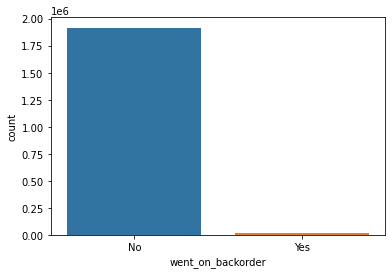

In [ ]:
# Class ratio of target feature
print(df['went_on_backorder'].value_counts()/len(df.went_on_backorder)*100)
sns.countplot(df['went_on_backorder'])

*   99.27% belong to class 'No' and 0.72% belong to class 'Yes'
*   Class ratio of majority class to minority class is 137:1
*   We have an imbalanced dataset, and resampling techniques (oversampling or undersampling) should be used to address this issue

Text(0.5, 1.0, 'Box plot of national_inv')

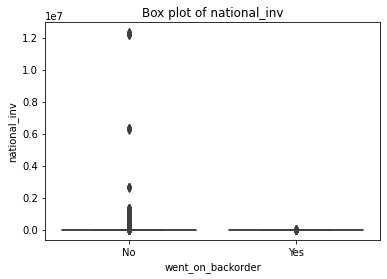

In [ ]:
# Box plot for 'national_inv'
sns.boxplot(x = 'went_on_backorder', y = 'national_inv', data = df).set_title('Box plot of national_inv')

Text(0.5, 1.0, 'Box plot of national_inv from 0.1th to 90th percentile')

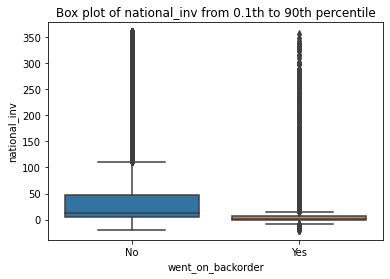

In [ ]:
# Box plot of 'national_inv' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'national_inv', data = df[(df.national_inv < df.national_inv.quantile(0.9))  & (df.national_inv > df.national_inv.quantile(0.001)) ]).set_title('Box plot of national_inv from 0.1th to 90th percentile')

*   Second box plot with data until 90th percentiel has been plotted because it is very tough to infer from the first box plot
*   The number of outliers is high in majority class than in minority class
*   The Inter-Quartile Range is very small, but the range is very high




Text(0.5, 1.0, 'Box plot of lead_time')

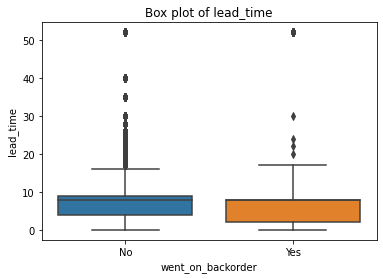

In [ ]:
# Box plot for 'lead_time'
sns.boxplot(x = 'went_on_backorder', y = 'lead_time', data = df).set_title('Box plot of lead_time')

*   The number of outliers is low when compared to 'national_inv'

Text(0.5, 1.0, 'Box plot of in_transit_qty')

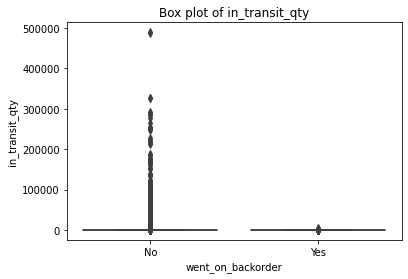

In [ ]:
# Box plot for 'in_transit_qty'
sns.boxplot(x = 'went_on_backorder', y = 'in_transit_qty', data = df).set_title('Box plot of in_transit_qty')

Text(0.5, 1.0, 'Box plot of in_transit_qty from 0.1th to 90th percentile')

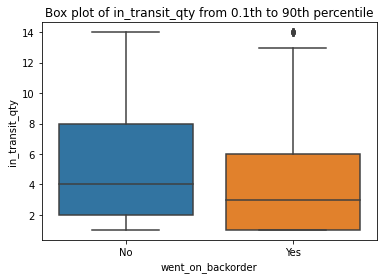

In [ ]:
# Box plot of 'in_transit_qty' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'in_transit_qty', data = df[(df.in_transit_qty < df.in_transit_qty.quantile(0.9))  & (df.in_transit_qty > df.in_transit_qty.quantile(0.001)) ]).set_title('Box plot of in_transit_qty from 0.1th to 90th percentile')

*   The number of outliers is high in majority class than in minority class

Text(0.5, 1.0, 'Box plot of forecast_3_month')

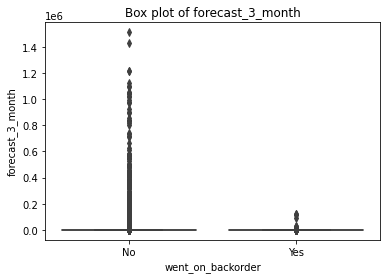

In [ ]:
# Box plot for 'forecast_3_month'
sns.boxplot(x = 'went_on_backorder', y = 'forecast_3_month', data = df).set_title('Box plot of forecast_3_month')

Text(0.5, 1.0, 'Box plot of forecast_3_month from 0.1th to 90th percentile')

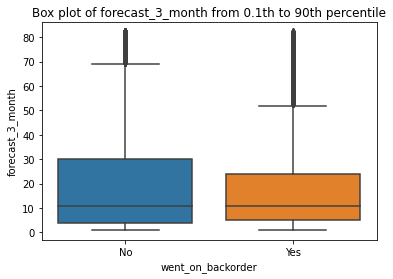

In [ ]:
# Box plot of 'forecast_3_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'forecast_3_month', data = df[(df.forecast_3_month < df.forecast_3_month.quantile(0.9))  & (df.forecast_3_month > df.forecast_3_month.quantile(0.001)) ]).set_title('Box plot of forecast_3_month from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_6_month')

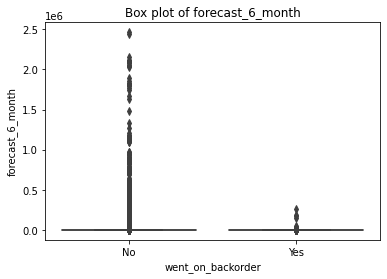

In [ ]:
# Box plot for 'forecast_6_month'
sns.boxplot(x = 'went_on_backorder', y = 'forecast_6_month', data = df).set_title('Box plot of forecast_6_month')

Text(0.5, 1.0, 'Box plot of forecast_6_month from 0.1th to 90th percentile')

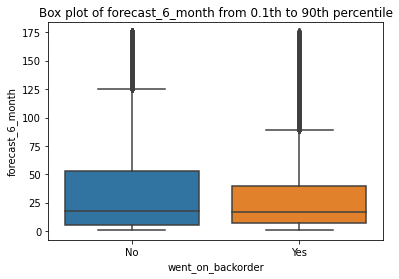

In [ ]:
# Box plot of 'forecast_6_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'forecast_6_month', data = df[(df.forecast_6_month < df.forecast_6_month.quantile(0.9))  & (df.forecast_6_month > df.forecast_6_month.quantile(0.001)) ]).set_title('Box plot of forecast_6_month from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_9_month')

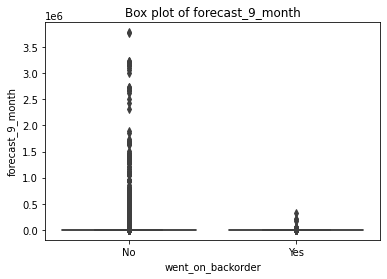

In [ ]:
# Box plot for 'forecast_9_month'
sns.boxplot(x = 'went_on_backorder', y = 'forecast_9_month', data = df).set_title('Box plot of forecast_9_month')

Text(0.5, 1.0, 'Box plot of forecast_9_month from 0.1th to 90th percentile')

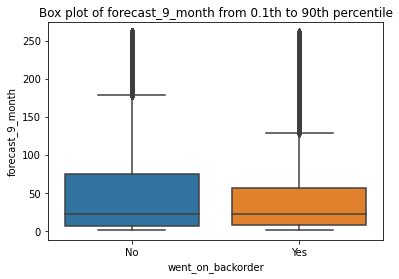

In [ ]:
# Box plot of 'forecast_9_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'forecast_9_month', data = df[(df.forecast_9_month < df.forecast_9_month.quantile(0.9))  & (df.forecast_9_month > df.forecast_9_month.quantile(0.001)) ]).set_title('Box plot of forecast_9_month from 0.1th to 90th percentile')

*   The distribution of all the 3 forecasts is similar
*   Median value is almost equal in both the classes for all the 3 forecasts



Text(0.5, 1.0, 'Box plot of sales_1_month')

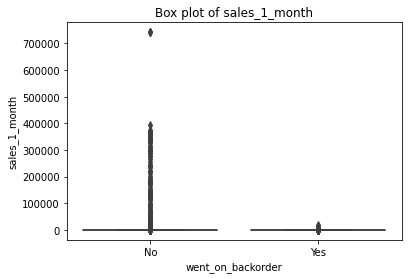

In [ ]:
# Box plot for 'sales_1_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_1_month', data = df).set_title('Box plot of sales_1_month')

Text(0.5, 1.0, 'Box plot of sales_1_month from 0.1th to 90th percentile')

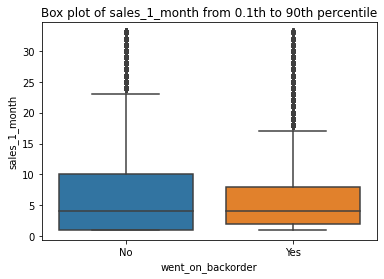

In [ ]:
# Box plot of 'sales_1_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_1_month', data = df[(df.sales_1_month < df.sales_1_month.quantile(0.9))  & (df.sales_1_month > df.sales_1_month.quantile(0.001)) ]).set_title('Box plot of sales_1_month from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_3_month')

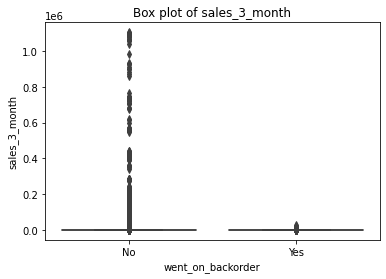

In [ ]:
# Box plot for 'sales_3_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_3_month', data = df).set_title('Box plot of sales_3_month')

Text(0.5, 1.0, 'Box plot of sales_3_month from 0.1th to 90th percentile')

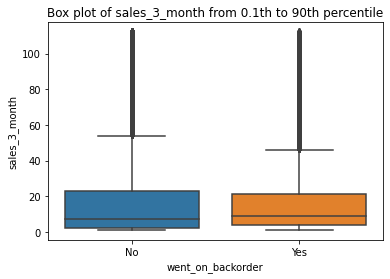

In [ ]:
# Box plot of 'sales_3_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_3_month', data = df[(df.sales_3_month < df.sales_3_month.quantile(0.9))  & (df.sales_3_month > df.sales_3_month.quantile(0.001)) ]).set_title('Box plot of sales_3_month from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_6_month')

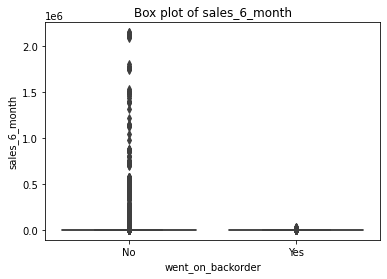

In [ ]:
# Box plot for 'sales_6_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_6_month', data = df).set_title('Box plot of sales_6_month')

Text(0.5, 1.0, 'Box plot of sales_6_month from 0.1th to 90th percentile')

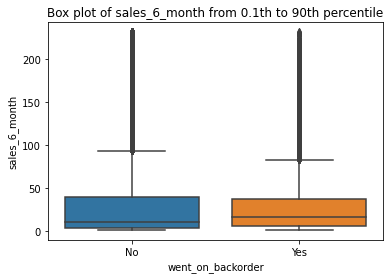

In [ ]:
# Box plot of 'sales_6_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_6_month', data = df[(df.sales_6_month < df.sales_6_month.quantile(0.9))  & (df.sales_6_month > df.sales_6_month.quantile(0.001)) ]).set_title('Box plot of sales_6_month from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_9_month')

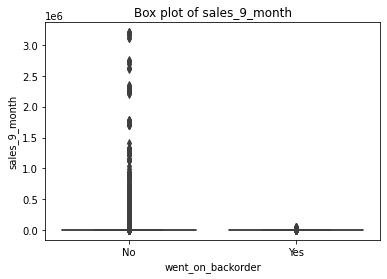

In [ ]:
# Box plot for 'sales_9_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_9_month', data = df).set_title('Box plot of sales_9_month')

Text(0.5, 1.0, 'Box plot of sales_9_month from 0.1th to 90th percentile')

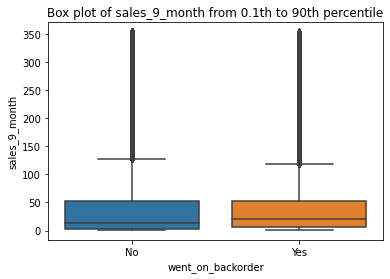

In [ ]:
# Box plot of 'sales_9_month' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_9_month', data = df[(df.sales_9_month < df.sales_9_month.quantile(0.9))  & (df.sales_9_month > df.sales_9_month.quantile(0.001)) ]).set_title('Box plot of sales_9_month from 0.1th to 90th percentile')

*   The number of outliers is higher in majority class in all the 4 sales features
*   It looks like the sales features are right skewed

Text(0.5, 1.0, 'Box plot of min_bank')

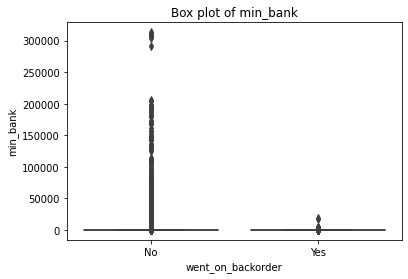

In [ ]:
# Box plot for 'min_bank'
sns.boxplot(x = 'went_on_backorder', y = 'min_bank', data = df).set_title('Box plot of min_bank')

Text(0.5, 1.0, 'Box plot of min_bank from 0.1th to 80th percentile')

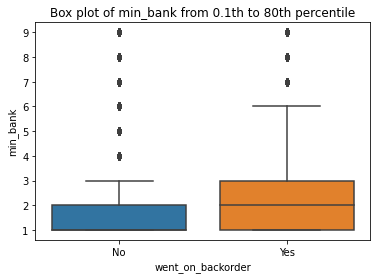

In [ ]:
# Box plot of 'min_bank' from 0.1th to 80th percentile
sns.boxplot(x = 'went_on_backorder', y = 'min_bank', data = df[(df.min_bank < df.min_bank.quantile(0.8))  & (df.min_bank > df.min_bank.quantile(0.001)) ]).set_title('Box plot of min_bank from 0.1th to 80th percentile')

*   It looks like the 'min_bank' feature is right skewed
*   For data considering only until 80th percentile, the chances of going under backorder is higher if 'min_bank' > 2



Text(0.5, 1.0, 'Box plot of perf_6_month_avg')

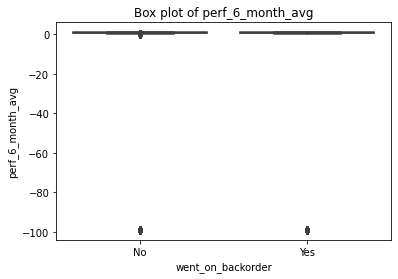

In [ ]:
# Box plot for 'perf_6_month_avg'
sns.boxplot(x = 'went_on_backorder', y = 'perf_6_month_avg', data = df).set_title('Box plot of perf_6_month_avg')	

Text(0.5, 1.0, 'Box plot of perf_6_month_avg from 0.1th to 90th percentile')

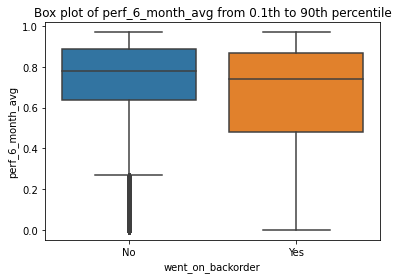

In [ ]:
# Box plot of 'perf_6_month_avg' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'perf_6_month_avg', data = df[(df.perf_6_month_avg < df.perf_6_month_avg.quantile(0.8))  & (df.perf_6_month_avg > df.perf_6_month_avg.quantile(0.001)) ]).set_title('Box plot of perf_6_month_avg from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of perf_12_month_avg')

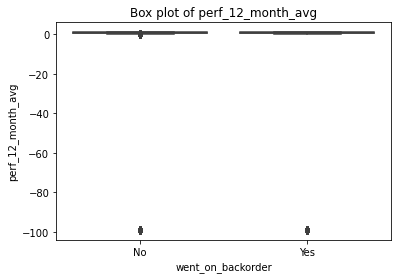

In [ ]:
# Box plot for 'perf_12_month_avg'
sns.boxplot(x = 'went_on_backorder', y = 'perf_12_month_avg', data = df).set_title('Box plot of perf_12_month_avg')	

Text(0.5, 1.0, 'Box plot of perf_12_month_avg from 0.1th to 90th percentile')

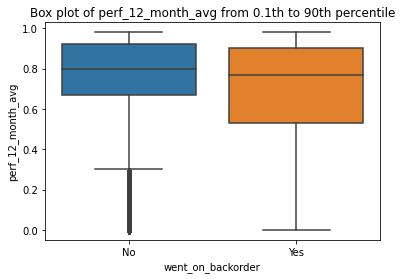

In [ ]:
# Box plot of 'perf_12_month_avg' from 0.1th to 90th percentile
sns.boxplot(x = 'went_on_backorder', y = 'perf_12_month_avg', data = df[(df.perf_12_month_avg < df.perf_12_month_avg.quantile(0.9))  & (df.perf_12_month_avg > df.perf_12_month_avg.quantile(0.001)) ]).set_title('Box plot of perf_12_month_avg from 0.1th to 90th percentile')

*   There are significant number of values which are equal to -99, and it looks like the assumption which is made about missing values being replaced with -99 is true

went_on_backorder        No       Yes
rev_stop                             
No                 0.992755  0.007245
Yes                0.995232  0.004768


Text(0.5, 1.0, 'Bar plot showing proportion of items went into back order based on flag rev_stop')

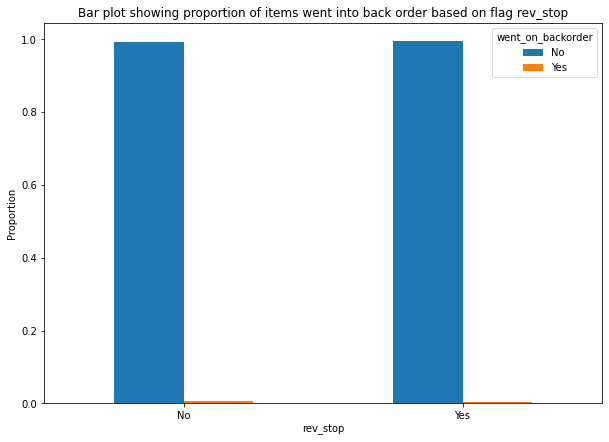

In [ ]:
# Bar plot of 'rev_stop'
count = df.groupby(['rev_stop','went_on_backorder']).size().unstack()

proportion = count.T.div(count.T.sum()).T
print(proportion)

fig,ax = plt.subplots()
proportion.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('rev_stop')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Bar plot showing proportion of items went into back order based on flag rev_stop')

*   When rev_stop = No, product did not go to backorder 99.27% of times
*   When rev_stop = Yes, product did not go to backorder 99.52% of times
*   So, the 'rev_stop' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'rev_stop' flag values



went_on_backorder        No       Yes
potential_issue                      
No                 0.992780  0.007220
Yes                0.945399  0.054601


Text(0.5, 1.0, 'Bar plot showing proportion of items went into back order based on flag potential_issue')

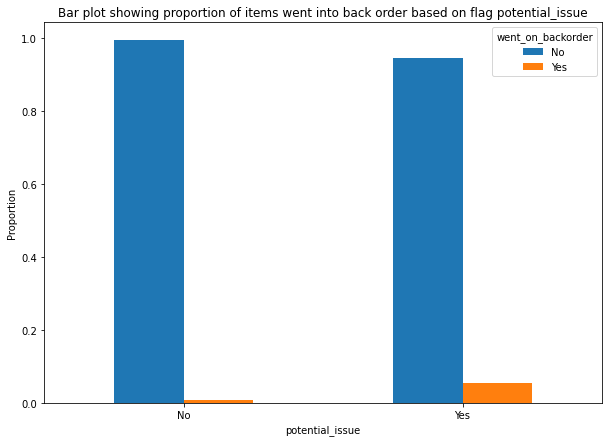

In [ ]:
# Bar plot of 'potential_issue'
count = df.groupby(['potential_issue','went_on_backorder']).size().unstack()

proportion = count.T.div(count.T.sum()).T
print(proportion)

fig,ax = plt.subplots()
proportion.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('potential_issue')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Bar plot showing proportion of items went into back order based on flag potential_issue')

*   When there is a potential_issue, product did not go to backorder 99.27% of times
*   When there is a potential_issue, product did not go to backorder 94.53% of times
*   The product going to backorder is 7.5 times higher when there is a potential issue when compared to when there is no potential issue

went_on_backorder        No       Yes
deck_risk                            
No                 0.992169  0.007831
Yes                0.994771  0.005229


Text(0.5, 1.0, 'Bar plot showing proportion of items went into back order based on flag deck_risk')

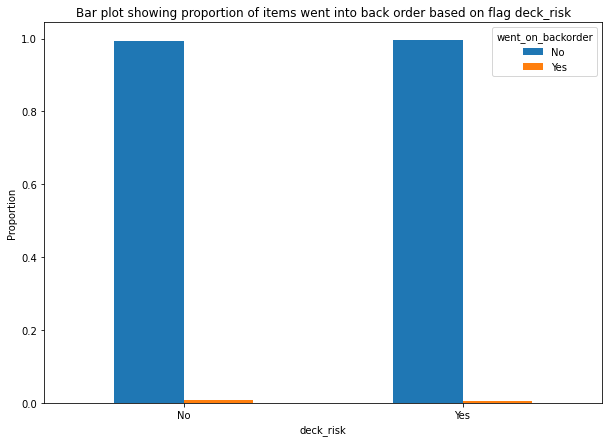

In [ ]:
# Bar plot of 'deck_risk'
count = df.groupby(['deck_risk','went_on_backorder']).size().unstack()

proportion = count.T.div(count.T.sum()).T
print(proportion)

fig,ax = plt.subplots()
proportion.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('deck_risk')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Bar plot showing proportion of items went into back order based on flag deck_risk')

*   When deck_risk = No, product did not go to backorder 99.21% of times
*   When deck_risk = Yes, product did not go to backorder 99.47% of times
*   So, the 'deck_risk' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'deck_risk' flag values

went_on_backorder        No       Yes
oe_constraint                        
No                 0.992759  0.007241
Yes                0.969178  0.030822


Text(0.5, 1.0, 'Bar plot showing proportion of items went into back order based on flag oe_constraint')

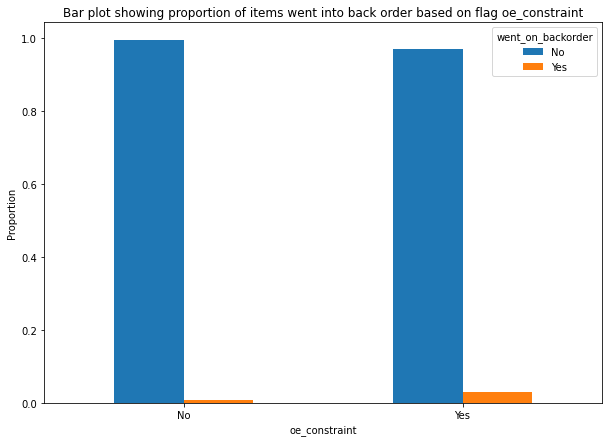

In [ ]:
# Bar plot of 'oe_constraint'
count = df.groupby(['oe_constraint','went_on_backorder']).size().unstack()

proportion = count.T.div(count.T.sum()).T
print(proportion)

fig,ax = plt.subplots()
proportion.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('oe_constraint')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Bar plot showing proportion of items went into back order based on flag oe_constraint')

*   When oe_constraint = No, product did not go to backorder 99.27% of times
*   When oe_constraint = Yes, product did not go to backorder 96.91% of times
*   When oe_constraint = Yes, then the product going to backorder is 4 times higher than when oe_constraint = No

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993019  0.006981
Yes                0.990836  0.009164


Text(0.5, 1.0, 'Bar plot showing proportion of items went into back order based on flag ppap_risk')

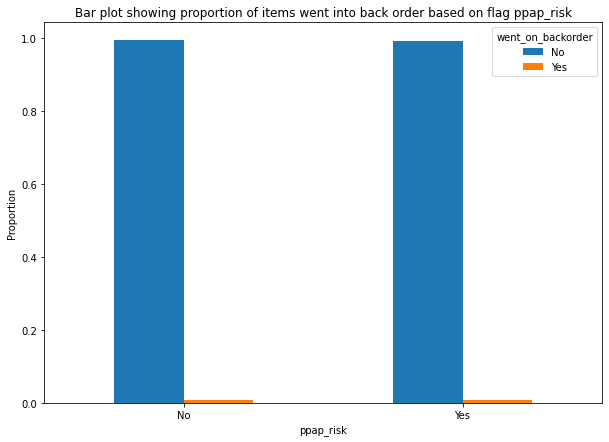

In [ ]:
# Bar plot of 'ppap_risk'
count = df.groupby(['ppap_risk','went_on_backorder']).size().unstack()

proportion = count.T.div(count.T.sum()).T
print(proportion)

fig,ax = plt.subplots()
proportion.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('ppap_risk')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Bar plot showing proportion of items went into back order based on flag ppap_risk')

*   When ppap_risk = No, product did not go to backorder 99.3% of times
*   When ppap_risk = Yes, product did not go to backorder 99.08% of times
*   So, the 'ppap_risk' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'ppap_risk' flag values

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.991807  0.008193
Yes                0.992792  0.007208


Text(0.5, 1.0, 'Bar plot showing proportion of items went into back order based on flag stop_auto_buy')

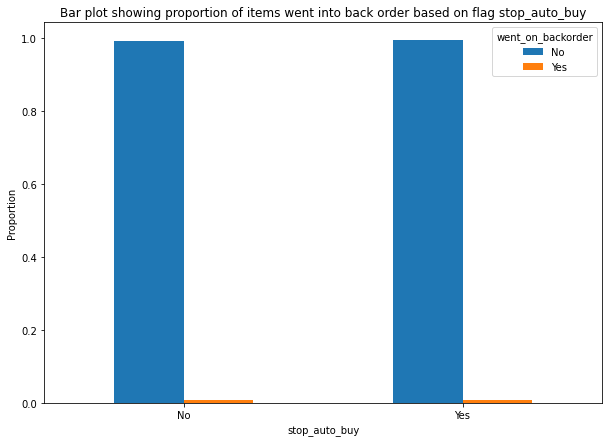

In [ ]:
# Bar plot of 'stop_auto_buy'
count = df.groupby(['stop_auto_buy','went_on_backorder']).size().unstack()

proportion = count.T.div(count.T.sum()).T
print(proportion)

fig,ax = plt.subplots()
proportion.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('stop_auto_buy')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Bar plot showing proportion of items went into back order based on flag stop_auto_buy')

*   When stop_auto_buy = No, product did not go to backorder 99.18% of times
*   When stop_auto_buy = Yes, product did not go to backorder 99.27% of times
*   So, the 'stop_auto_buy' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'stop_auto_buy' flag values

In [ ]:
# Pair plots for forecast features
sns.pairplot(df[['forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'went_on_backorder']], hue = 'went_on_backorder')

In [ ]:
# Pair plots for sales features
sns.pairplot(df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','went_on_backorder']], hue = 'went_on_backorder')

In [ ]:
#['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 
#'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

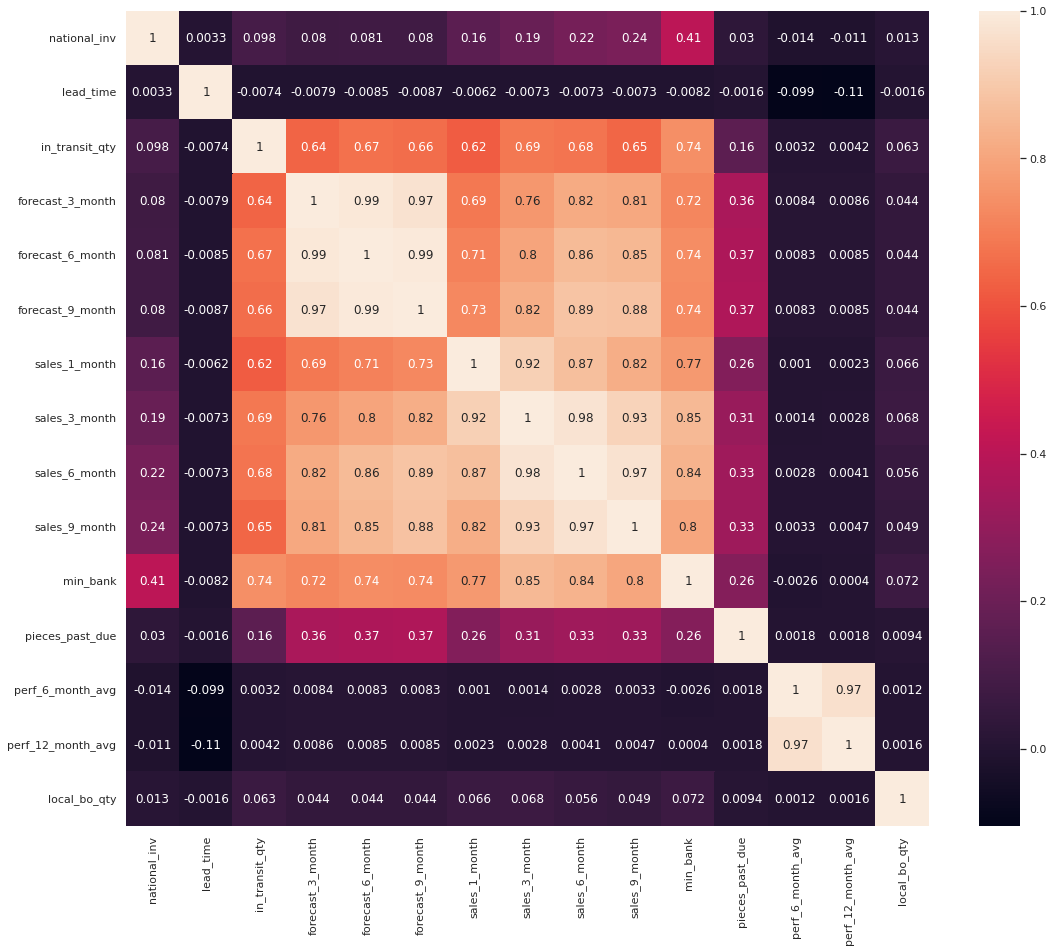

In [ ]:
cor = df.corr()
sns.set(rc={'figure.figsize':(18,15)})
# plot the heatmap
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns,annot = True)

**Preprocessing**

In [ ]:
# Replacing -99 values with Nan
df['perf_6_month_avg'] = df['perf_6_month_avg'].replace({-99: np.nan})
df['perf_12_month_avg'] = df['perf_12_month_avg'].replace({-99: np.nan})

In [ ]:
# Binary encoding categorical variables
categorical_features = df.select_dtypes(include = ['object']).columns
for feature in categorical_features:
    df[feature] = df[feature].replace({'Yes': 1, 'No': 0})

In [ ]:
# Missing values
print('Number of missing values before imputing:', df.isna().sum().sum())
print('Percentage of missing values:\n', df[['lead_time', 'perf_6_month_avg', 'perf_12_month_avg']].isna().mean())

Number of missing values before imputing: 404221
Percentage of missing values:
 lead_time            0.059907
perf_6_month_avg     0.076987
perf_12_month_avg    0.072554
dtype: float64


*   Percentage of missing values is very low, so let us impute them



In [ ]:
# Imputing missing values
#imputer = IterativeImputer(random_state=42)
#imputed = imputer.fit_transform(df)
#df = pd.DataFrame(imputed, columns=df.columns)
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['perf_6_month_avg'] = df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].mean())
df['perf_12_month_avg'] = df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].mean())
print('Number of missing values after imputing:', df.isna().sum().sum())

Number of missing values after imputing: 0


In [ ]:
# Splitting the dataframe into train and test sets
X = df.drop('went_on_backorder', axis = 1)
y = df['went_on_backorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
right_skewed = ['national_inv' , 'in_transit_qty' , 'forecast_3_month', 'forecast_6_month', 'forecast_9_month' , 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month' , 'min_bank', 'pieces_past_due', 'local_bo_qty']

In [ ]:
log_columns = []
for i in right_skewed:
  log_columns.append(X_train.columns.get_loc(i))

In [ ]:
log_columns

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]

In [ ]:
def log_transform(a):
  sign = np.sign(a[log_columns])
  a[log_columns] =  np.log(1.0+abs(a[log_columns]))*sign
  return a

In [ ]:
X_train = np.apply_along_axis(log_transform, 1, X_train)
X_test = np.apply_along_axis(log_transform, 1, X_test)

In [ ]:
# Scaling the data
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [ ]:
# Checking the y_train to see if the data is balanced or not
y_train.value_counts()

0    1341250
1       9704
Name: went_on_backorder, dtype: int64

In [ ]:
# From above we can see that there is a class imbalance 
# Performing over-sampling to deal with imbalanced data
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After', counter)

Before Counter({0: 1341250, 1: 9704})
After Counter({0: 1341250, 1: 1341250})


**Modelling**

In [ ]:
# Function to print various performance metrics
def performance_metrics(X_train, X_test, y_train, y_test, y_pred, model):
  conf_matrix = confusion_matrix(y_test, y_pred)
  
  plt.figure(figsize = (7,7))
  sns.heatmap(conf_matrix, annot = True, fmt='g', vmin=0, cmap = 'Blues', cbar = False)
  plt.xticks(ticks=[0.5, 1.5])
  plt.yticks(ticks=[0.5, 1.5])
  plt.xlabel('Predictions')
  plt.ylabel('Actuals')
  plt.title('Confusion Matrix')
  plt.show()

  print('Train Accuracy: %.3f' % model.score(X_train, y_train))
  print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred)) 
  print('Precision: %.3f' % precision_score(y_test, y_pred, average='macro'))
  print('Recall: %.3f' % recall_score(y_test, y_pred, average='macro'))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred, average='macro'))

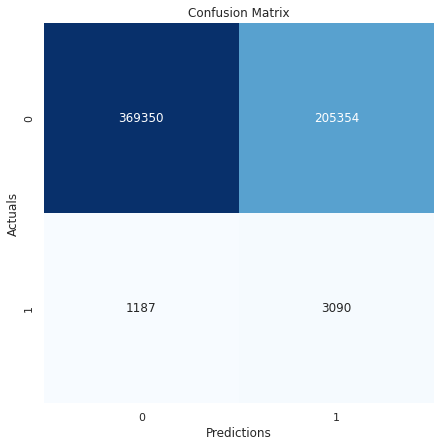

Train Accuracy: 0.681
Test Accuracy: 0.643
Precision: 0.506
Recall: 0.683
F1 Score: 0.405


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, lr)

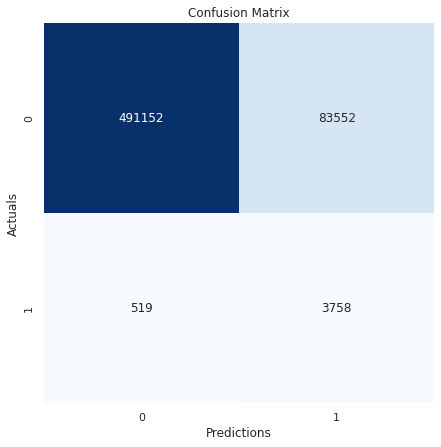

Train Accuracy: 0.872
Test Accuracy: 0.855
Precision: 0.521
Recall: 0.867
F1 Score: 0.502


In [ ]:
# Logistic Regression with log transform
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, lr)

In [ ]:
# Logistic Regression Hyper-parameter Tuning
lr = LogisticRegression()

param_grid = [{'penalty': ['l1', 'l2', 'elasticnet'],
               'C': np.logspace(-4,4,20),
               'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'max_iter': [2000]}]

clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = True, n_jobs = -1)

best_clf = clf.fit(X_train, y_train)                         
print(best_clf.best_estimator_)
y_pred = best_clf.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, best_clf)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, knn)

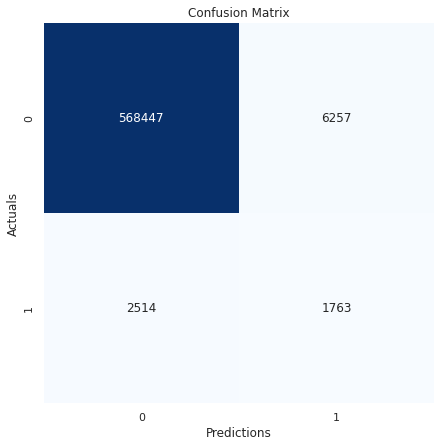

Train Accuracy: 0.997
Test Accuracy: 0.985
Precision: 0.608
Recall: 0.701
F1 Score: 0.640


In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, dtree)

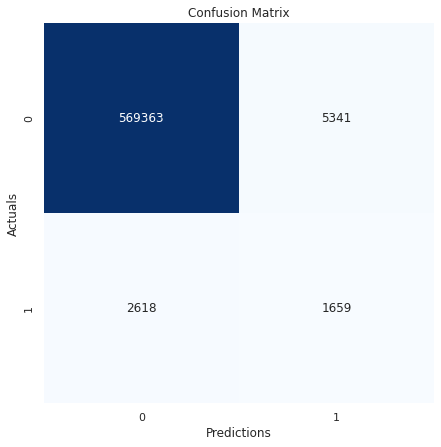

Train Accuracy: 0.998
Test Accuracy: 0.986
Precision: 0.616
Recall: 0.689
F1 Score: 0.644


In [ ]:
# Decision Tree with log transform
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, dtree)

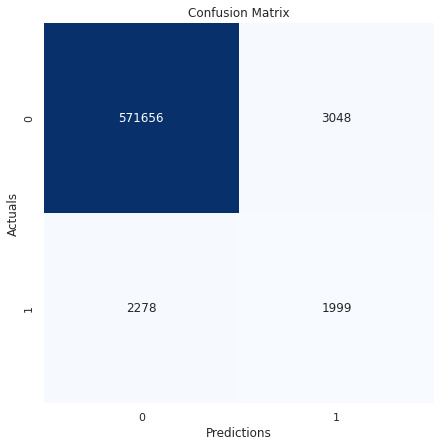

Train Accuracy: 0.997
Test Accuracy: 0.991
Precision: 0.696
Recall: 0.731
F1 Score: 0.712


In [ ]:
# Random Forest
rfm = RandomForestClassifier(random_state = 42)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, rfm)

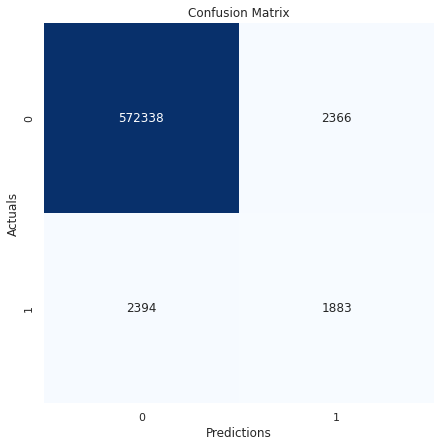

Train Accuracy: 0.998
Test Accuracy: 0.992
Precision: 0.719
Recall: 0.718
F1 Score: 0.719


In [ ]:
# Random Forest with log transform
rfm = RandomForestClassifier(random_state = 42)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, rfm)

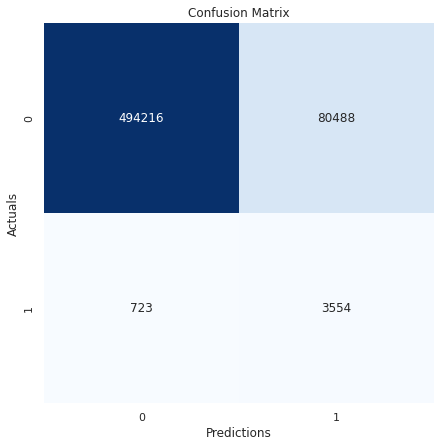

Train Accuracy: 0.885
Test Accuracy: 0.860
Precision: 0.520
Recall: 0.845
F1 Score: 0.502


In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, xgb)

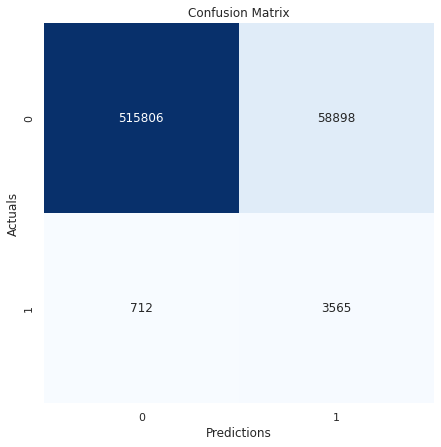

Train Accuracy: 0.910
Test Accuracy: 0.897
Precision: 0.528
Recall: 0.866
F1 Score: 0.526


In [ ]:
# XGBoost with log transform
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, xgb)